## Connexion MongoDB

On commence par importer le module csv afin de pouvoir travailler par la suite avec les fichiers csv.
On importe MongoClient, qui appartient à pymongo.

In [24]:
import csv

from pymongo import MongoClient

L'étape suivante est d'établir la connexion avec MongoClient, avec les paramètres par défaut qui ont été attribué lors de l'ouverture du logiciel.

In [22]:
client = MongoClient('localhost', 27017)

On créé ensuite notre base de données Spinoff3 et on s'y connecte.

In [23]:
db = client['Spinoff3']

On vérifie les bases de données existantes : 'Spinoff3' que l'on vient de créer, 'admin', 'config' et 'local' présentes par défaut, et 'ma_db' créée pour un test. Le compte est bon !

In [20]:
print(client.list_database_names())

['Spinoff3', 'admin', 'config', 'local', 'ma_db']


On créé une collection (table sous SQL) à la BDD connectée (Spinoff3) que l'on nommera 'movies'. On se connecte à cette table.

In [5]:
collection = db['movies']

In [16]:
db.list_collection_names()

['movies']

## Insertion des données

Nous définissons la fonction 'lire_csv_Dict' déjà utilisée lors d'anciens briefs pour qu'elle puisse lire toutes les données d'un fichier qu'on lui attribuera par la suite.

In [25]:
def lire_csv_Dict(nom_fichier):
    data = []
    with open(nom_fichier, newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            data.append(row)
        
    return data

On créé la variable 'movies' qui contiendra les données du fichier movies.csv.

In [8]:
movies = lire_csv_Dict("data/movies.csv")

On ajoute à la collection connectée (movies) les données contenues dans la variable 'movies' que l'on vient de créer. Les données sont ainsi insérées.

In [9]:
collection.insert_many(movies)

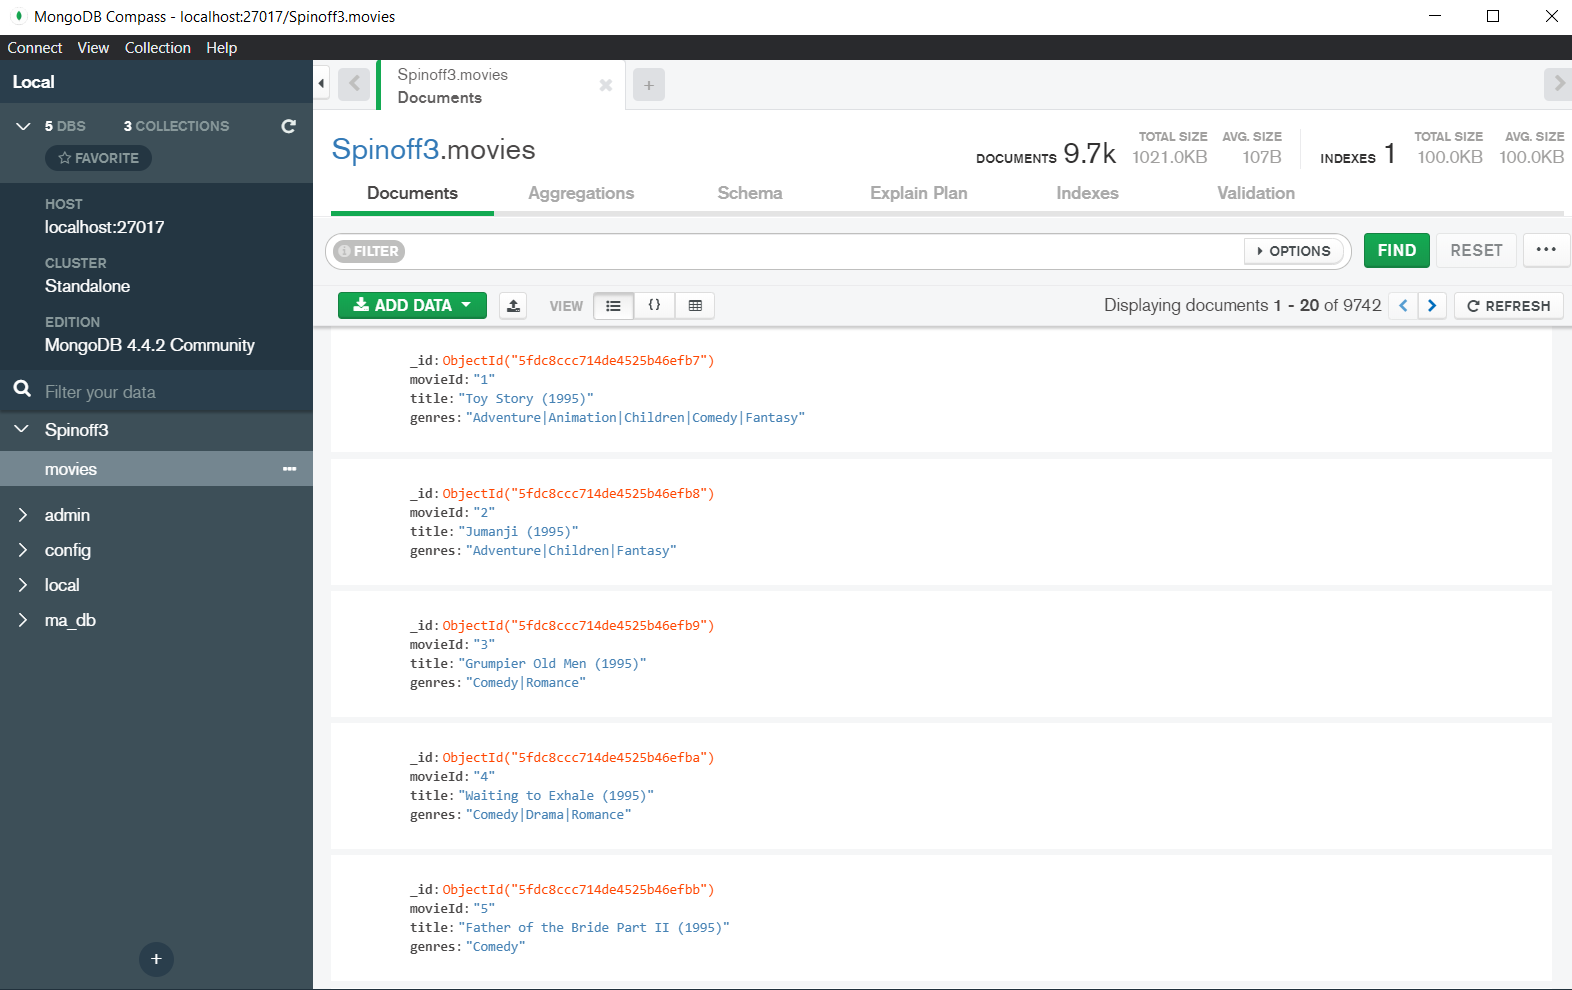

In [29]:
from IPython.display import Image
Image('C:/Users/levog/OneDrive/Images/Camera Roll/mongodb.png')

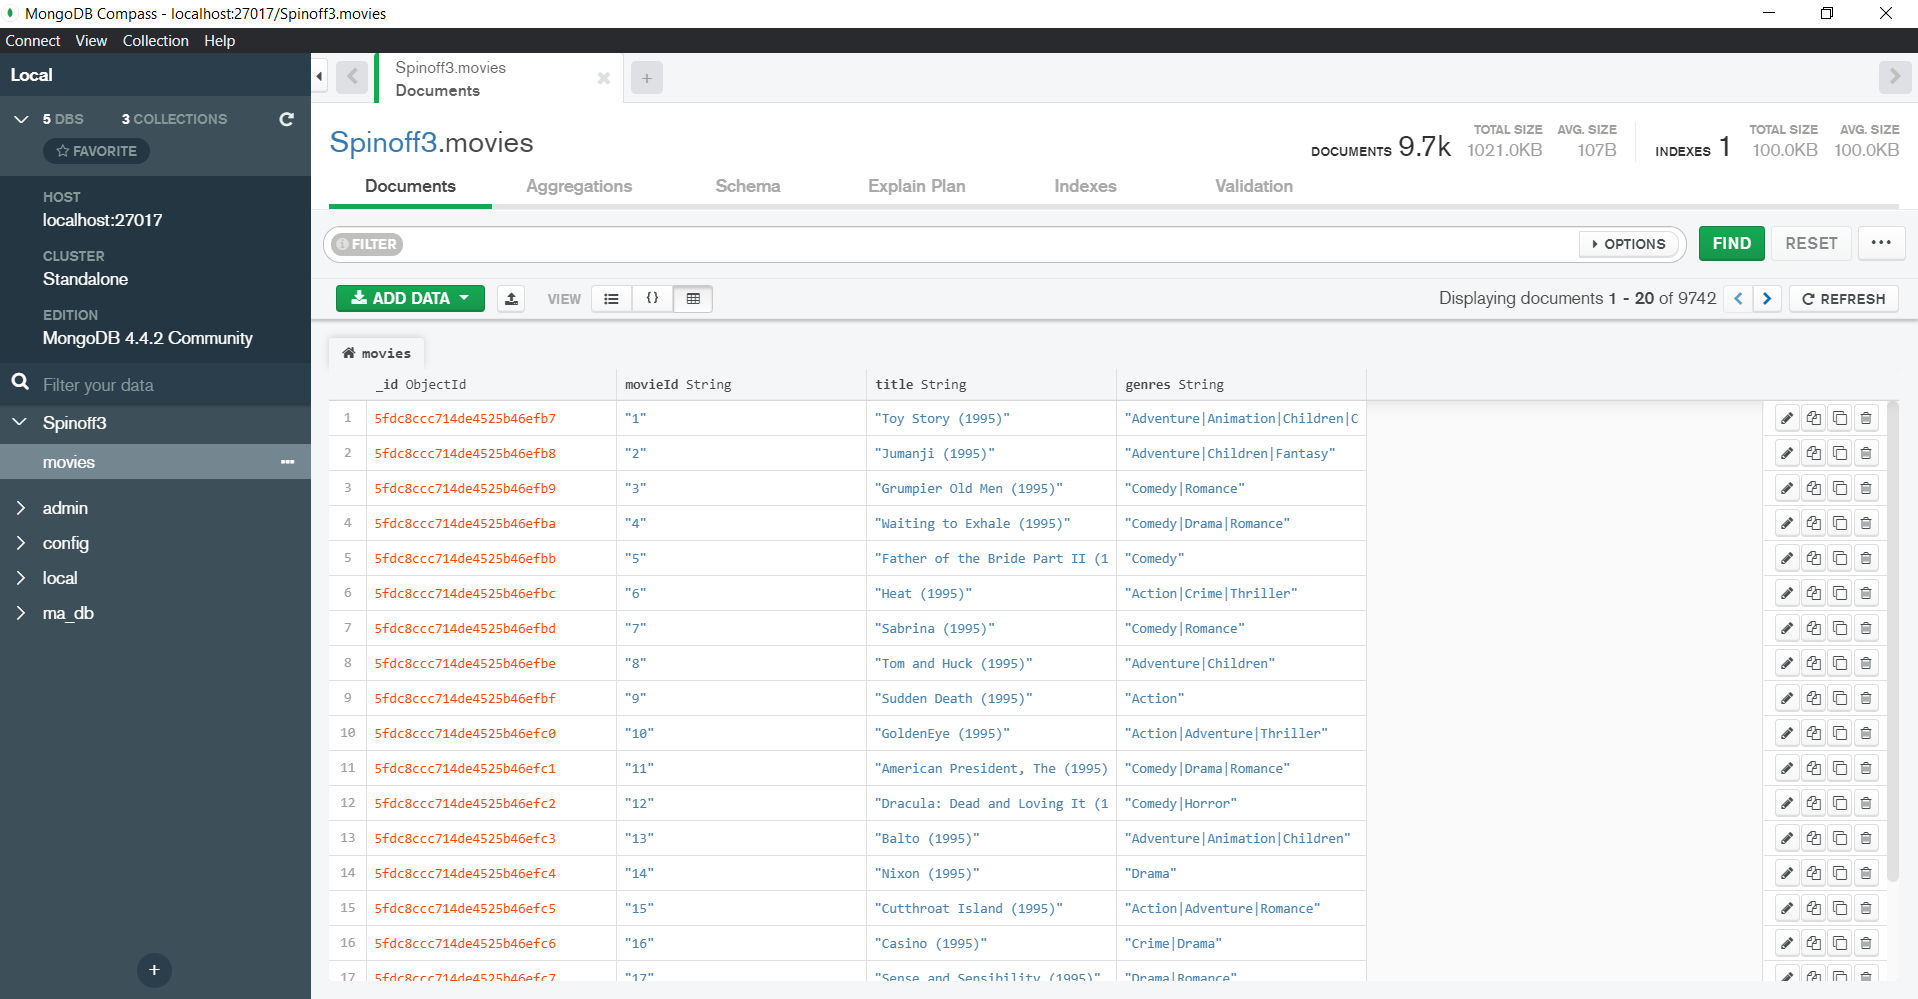

In [1]:
from IPython.display import Image
Image('C:/Users/levog/OneDrive/Images/Camera Roll/tab.png')

## Visualisation

Nous importons le module pprint afin d'afficher des donénes issues de la BDD.

In [11]:
import pprint

Nous réalisons ensuite une requête pour connaître la liste des documents présents dans la collection 'movies'. Nous nous limitons aux 10 premiers résultats.

In [27]:
for movie in db.movies.find().limit(10):
    print(movie)

{'_id': ObjectId('5fdc8ccc714de4525b46efb7'), 'movieId': '1', 'title': 'Toy Story (1995)', 'genres': 'Adventure|Animation|Children|Comedy|Fantasy'}
{'_id': ObjectId('5fdc8ccc714de4525b46efb8'), 'movieId': '2', 'title': 'Jumanji (1995)', 'genres': 'Adventure|Children|Fantasy'}
{'_id': ObjectId('5fdc8ccc714de4525b46efb9'), 'movieId': '3', 'title': 'Grumpier Old Men (1995)', 'genres': 'Comedy|Romance'}
{'_id': ObjectId('5fdc8ccc714de4525b46efba'), 'movieId': '4', 'title': 'Waiting to Exhale (1995)', 'genres': 'Comedy|Drama|Romance'}
{'_id': ObjectId('5fdc8ccc714de4525b46efbb'), 'movieId': '5', 'title': 'Father of the Bride Part II (1995)', 'genres': 'Comedy'}
{'_id': ObjectId('5fdc8ccc714de4525b46efbc'), 'movieId': '6', 'title': 'Heat (1995)', 'genres': 'Action|Crime|Thriller'}
{'_id': ObjectId('5fdc8ccc714de4525b46efbd'), 'movieId': '7', 'title': 'Sabrina (1995)', 'genres': 'Comedy|Romance'}
{'_id': ObjectId('5fdc8ccc714de4525b46efbe'), 'movieId': '8', 'title': 'Tom and Huck (1995)', 'ge

Nous utilisons maintenant la fonction 'find_one' pour ne ressortir qu'un document. Comme nous n'avons spécifié aucune condition, le résultat qui sortira sera le 1er de la collection.

In [30]:
db.movies.find_one()

{'_id': ObjectId('5fdc8ccc714de4525b46efb7'),
 'movieId': '1',
 'title': 'Toy Story (1995)',
 'genres': 'Adventure|Animation|Children|Comedy|Fantasy'}

Poiur vérifier que les conditions fonctionnent bien, nous faisons sortir le movieId:10, il s'agit de GoldenEye.

In [37]:
db.movies.find_one({'movieId' : '10'})

{'_id': ObjectId('5fdc8ccc714de4525b46efc0'),
 'movieId': '10',
 'title': 'GoldenEye (1995)',
 'genres': 'Action|Adventure|Thriller'}

Nous souhaitons maintenant connaître les Thriller présente dans cette collection. Nous nous limitons aux 10 premiers résultats.

In [46]:
for movie in collection.find({'genres' : 'Thriller'}).limit(10):
    print(movie)

{'_id': ObjectId('5fdc8ccc714de4525b46f027'), 'movieId': '132', 'title': 'Jade (1995)', 'genres': 'Thriller'}
{'_id': ObjectId('5fdc8ccc714de4525b46f058'), 'movieId': '190', 'title': 'Safe (1995)', 'genres': 'Thriller'}
{'_id': ObjectId('5fdc8ccc714de4525b46f085'), 'movieId': '240', 'title': 'Hideaway (1995)', 'genres': 'Thriller'}
{'_id': ObjectId('5fdc8ccc714de4525b46f102'), 'movieId': '373', 'title': 'Red Rock West (1992)', 'genres': 'Thriller'}
{'_id': ObjectId('5fdc8ccc714de4525b46f125'), 'movieId': '422', 'title': 'Blink (1994)', 'genres': 'Thriller'}
{'_id': ObjectId('5fdc8ccc714de4525b46f145'), 'movieId': '457', 'title': 'Fugitive, The (1993)', 'genres': 'Thriller'}
{'_id': ObjectId('5fdc8ccc714de4525b46f162'), 'movieId': '490', 'title': 'Malice (1993)', 'genres': 'Thriller'}
{'_id': ObjectId('5fdc8ccc714de4525b46f190'), 'movieId': '540', 'title': 'Sliver (1993)', 'genres': 'Thriller'}
{'_id': ObjectId('5fdc8ccc714de4525b46f1df'), 'movieId': '662', 'title': 'Fear (1996)', 'genr